## **Importing the *Mathematical* Libraries**

In [ ]:
import numpy as np 
import pandas as pd
import math 
import random

# **Importing the Graphical Libraries**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing the Dataset**

In [ ]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

# **Getting some information from the Dataset**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


# **Implementing Thompson Sampling**

In [ ]:
N_users = len(dataset[dataset.columns[0]])
n_columns = len(dataset.columns)
ads_selected = []
numbers_of_rewards_1 = list(np.zeros(n_columns,dtype= 'int')) 
numbers_of_rewards_0 = list(np.zeros(n_columns,dtype= 'int')) 
total_reward = 0
for n in range(0, N_users):
  ad = 0
  max_random = 0
  for i in range(0,n_columns):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if(random_beta > max_random): 
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n,ad]
  if(reward == 1):
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  total_reward = total_reward + reward


# **Visualising the results**

Text(0, 0.5, 'Number of times each ad was selected')

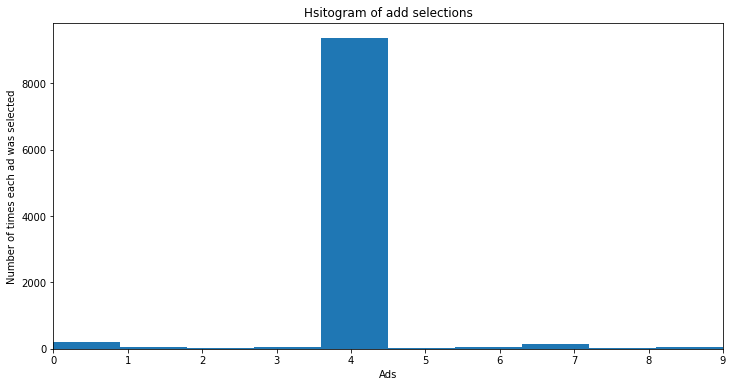

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(ads_selected,bins = 10)
plt.xlim((0,9))
plt.title('Hsitogram of add selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')